In [14]:
!wget -nc https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

File ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ already there; not retrieving.



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [16]:
df1 = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', index_col='Date', parse_dates=True)

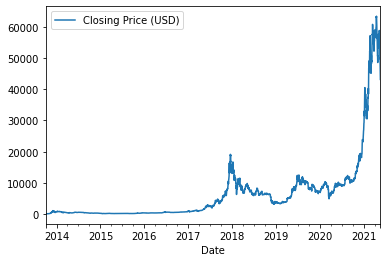

In [17]:
df = df1[['Closing Price (USD)']].copy().dropna()
df.plot();

In [18]:
def log_ret(price):
  log_price = np.log(price)
  return log_price.diff()

In [19]:
df['LogRet'] = log_ret(df['Closing Price (USD)'])

In [20]:
df.head()

,Closing Price (USD),LogRet
Date,,
2013-10-01,123.65499,NaN
2013-10-02,125.45500,0.014452
2013-10-03,108.58483,-0.144415
2013-10-04,118.67466,0.088854
2013-10-05,121.33866,0.022200


Text(0.5, 1.0, 'partial autocorrelation ar(10)')

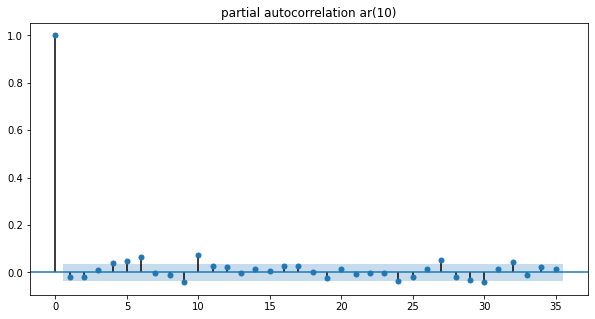

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df['LogRet'].dropna(), ax=ax);
plt.title('partial autocorrelation ar(10)')

Text(0.5, 1.0, 'Autocorrelation ma(10)')

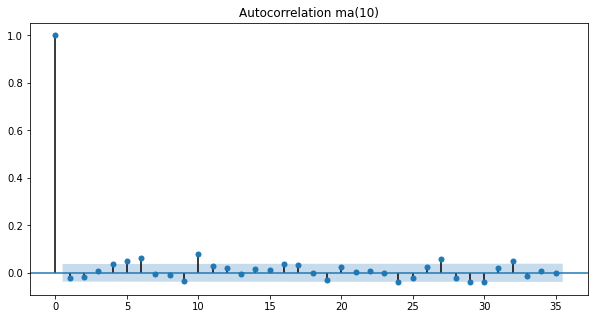

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df['LogRet'].dropna(), ax=ax);
plt.title('Autocorrelation ma(10)')